**import Required libraries :**


In [102]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from tensorflow.keras.utils import get_file
from tensorflow.keras.datasets import cifar10



`def calculate_histogram(image, color_space):`
This function essentially takes an input image and a specified color space, calculates the histogram, flattens it, normalizes it, and returns the resulting histogram.

`def compare_histograms(hist1, hist2):`
This function provides a straightforward way to compare two histograms by calculating their Euclidean distance. It is a common method for histogram-based image similarity analysis, where a smaller Euclidean distance indicates greater similarity between histograms.

`def calculate_similarity_score(input_hist, most_similar_hist):`
This function provides a normalized similarity score based on the Euclidean distance between two histograms. The formula used in the function ensures that the score is higher when the histograms are more similar and approaches 0 as the histograms become less similar.

`def analyze_similarity(input_photo, input_hist, distances, color_space):`
This function performs a comprehensive analysis of the similarity between the input photo and a set of photos, including visualizing the top matches, calculating accuracy, displaying the most similar photo, and providing a similarity score.

`def display_images(input_photo, similar_photos, titles, rows=4, cols=4):`
 this function provides a visual representation of the input photo and a set of similar photos in a grid with corresponding titles. It uses the matplotlib library to create the plot and display the images.
 
 

In [103]:
def calculate_histogram(image, color_space):
    
    if color_space == 'rgb':
        # Calculate the histogram using 8 bins for each channel (0-255)
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        
    elif color_space == 'hsv':
        # Convert the image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Calculate the histogram using 8 bins for each channel (0-255)
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        
    else:
        # Raise an error if the color space is neither 'rgb' nor 'hsv'
        raise ValueError("Invalid color space. Choose 'rgb' or 'hsv'.")
    
    # Flatten the histogram and normalize it
    hist = hist.flatten()
    hist /= hist.sum()
    return hist
    
def compare_histograms(hist1, hist2):
    # Calculate the Euclidean distance between two histograms
    return distance.euclidean(hist1, hist2)

def calculate_similarity_score(input_hist, most_similar_hist):
   # Calculate the similarity score between two histograms
    return 1 / (1 + compare_histograms(input_hist, most_similar_hist))

def analyze_similarity(input_photo, input_hist, distances, color_space):
    
    # Sort the list of distances based on the first element (distance)
    distances.sort(key=lambda x: x[0])

    # Select the top 10 photos with the smallest distances
    top_10_photos = distances[:10]
    # Generate titles for the top 10 photos with their labels and distances
    top_10_titles = [f"({i+1}) label: {label} | Dist: {dist:.2f}" for i, (dist, label, _) in enumerate(top_10_photos)]

    # Display the input photo and the top 10 similar photos with titles
    display_images(input_photo, [photo for _, _, photo in top_10_photos], top_10_titles)

    # Count how many of the top 10 photos have the same label as the closest photo
    correct_count = sum(1 for _, label, _ in top_10_photos if label == distances[0][1])
    # Calculate the accuracy percentage
    accuracy_percentage = (correct_count / 10) * 100
    
    # Print the number of correct photos and the accuracy percentage
    print(f"\033[1m{correct_count}\033[0m photos of those ten are in the same group as the input photo: \033[1m{accuracy_percentage:.2f}%")

    # Select the most similar photo
    most_similar_photo = distances[0][2]
    # Calculate the histogram of the most similar photo
    most_similar_hist = calculate_histogram(most_similar_photo, color_space)
    
    # Calculate the similarity score between the input and the most similar photo
    similarity_score = calculate_similarity_score(input_hist, most_similar_hist)
    
    # Display the input photo and the most similar photo with a title
    display_images(input_photo, [most_similar_photo], [f"Most Similar"])
    print(f"\033[1mSimilarity Score: {similarity_score:.2f}")

def display_images(input_photo, similar_photos, titles, rows=4, cols=4):

    plt.figure(figsize=(20, 15))
    
    # Display the input photo
    plt.subplot(rows, cols, 1)
    plt.imshow(cv2.cvtColor(input_photo, cv2.COLOR_BGR2RGB))
    plt.title("Input Photo")
    plt.axis("off")

    # Display the similar photos with titles
    for i, (photo, title) in enumerate(zip(similar_photos, titles), start=1):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")

    plt.show()



# For Corel Dataset :


`def main(input_photo_path, dataset_path, color_space):`


In this `main` function, an input photo is read from the specified file path, and its histogram is computed based on the chosen color space (RGB or HSV). Subsequently, the code iterates through a dataset containing various image folders, extracting each photo, calculating its histogram, and computing the Euclidean distance between the histograms of the input photo and each dataset image. These distances, along with folder labels and corresponding images, are stored in a list. The function then calls the `analyze_similarity` function, which sorts the distances, identifies the top 10 most similar images, and visualizes them along with accuracy metrics and a histogram-based similarity score. 
The code is executed when the script is run, focusing on the provided input photo within the specified dataset and color space.



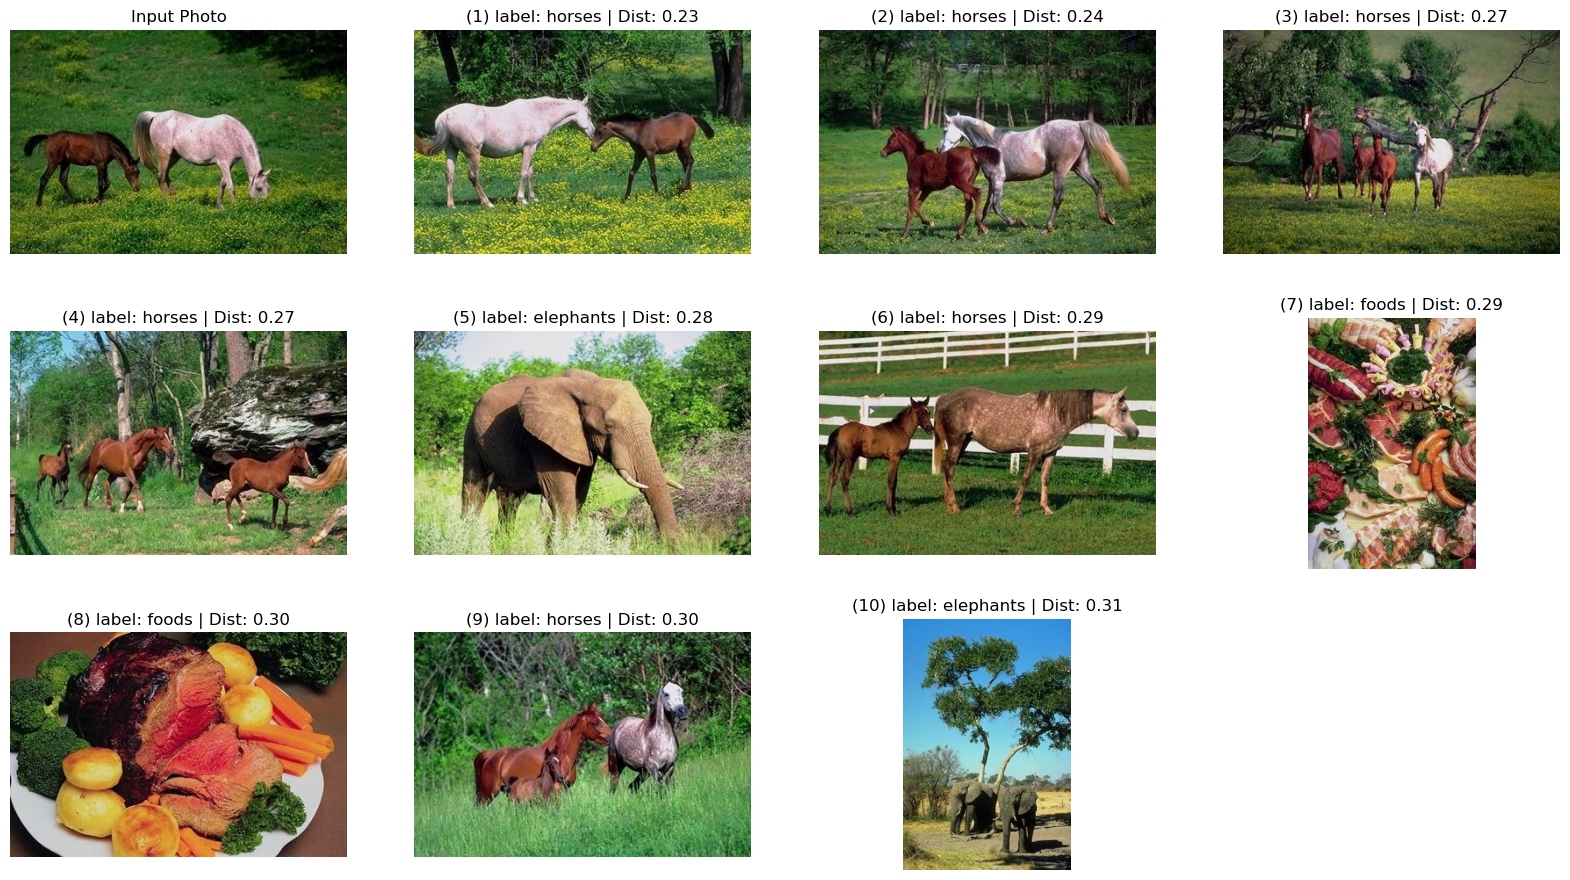

6 photos of those ten are in the same group as the input photo: 60.00%


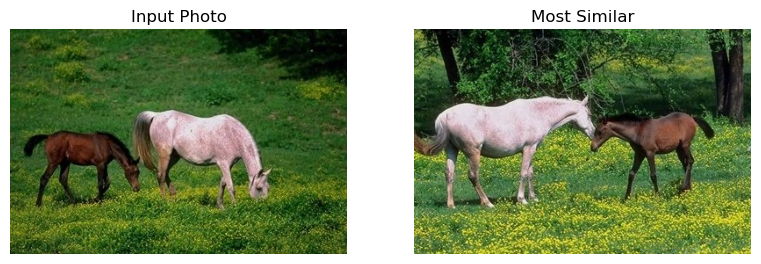

Similarity Score: 0.81


In [104]:
def main(input_photo_path, dataset_path, color_space):
    
    # Load input photo and calculate its histogram
    input_photo = cv2.imread(input_photo_path)
    input_hist = calculate_histogram(input_photo, color_space)
    
    # Initialize an empty list to store distances 
    distances = []
    
    # Loop through each folder in the dataset path
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        
        # Check if the item in the folder path is a directory
        if os.path.isdir(folder_path):
            # Loop through each file in the folder
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                
                 # Check if the item in the file path is a file
                if os.path.isfile(file_path):
                    
                    # Read the photo from the file path
                    photo = cv2.imread(file_path)
                    # Calculate histogram for the photo
                    photo_hist = calculate_histogram(photo, color_space)
                    # Calculate Euclidean distance between input photo and current photo
                    dist = compare_histograms(input_hist, photo_hist)
                    # Append the distance, folder (label), and photo to the distances list
                    distances.append((dist, folder, photo))
                    
    # Analyze the similarity between input photo and the dataset
    analyze_similarity(input_photo, input_hist, distances, color_space)

if __name__ == "__main__":
    
    input_photo_path = 'Documents/corel_dataset/training_set/horses/799.jpg'
    dataset_path = "Documents/corel_dataset/test_set"

    main(input_photo_path, dataset_path, color_space='rgb')

------



# For CIFAR-10 Dataset :

`def main(input_photo_path, dataset_path, color_space):`


In this `main` function, the CIFAR-10 dataset is loaded, and the last image from each of the 10 classes is extracted and saved. The specific class index for the input image is chosen, and its RGB image is saved as 'input_photo.jpg.' The code then reads this input photo, computes its histogram based on the specified color space (RGB or HSV), and proceeds to calculate the Euclidean distances between the input photo's histogram and those of all images in the CIFAR-10 training dataset. The resulting distances, along with class labels and corresponding images, are stored in a list. Finally, the `analyze_similarity` function is called to sort and analyze these distances, presenting the top 10 most similar images, accuracy metrics, and a histogram-based similarity score. The code is executed when the script is run, focusing on the chosen input photo within the CIFAR-10 dataset and utilizing the specified  color space for histogram computation.

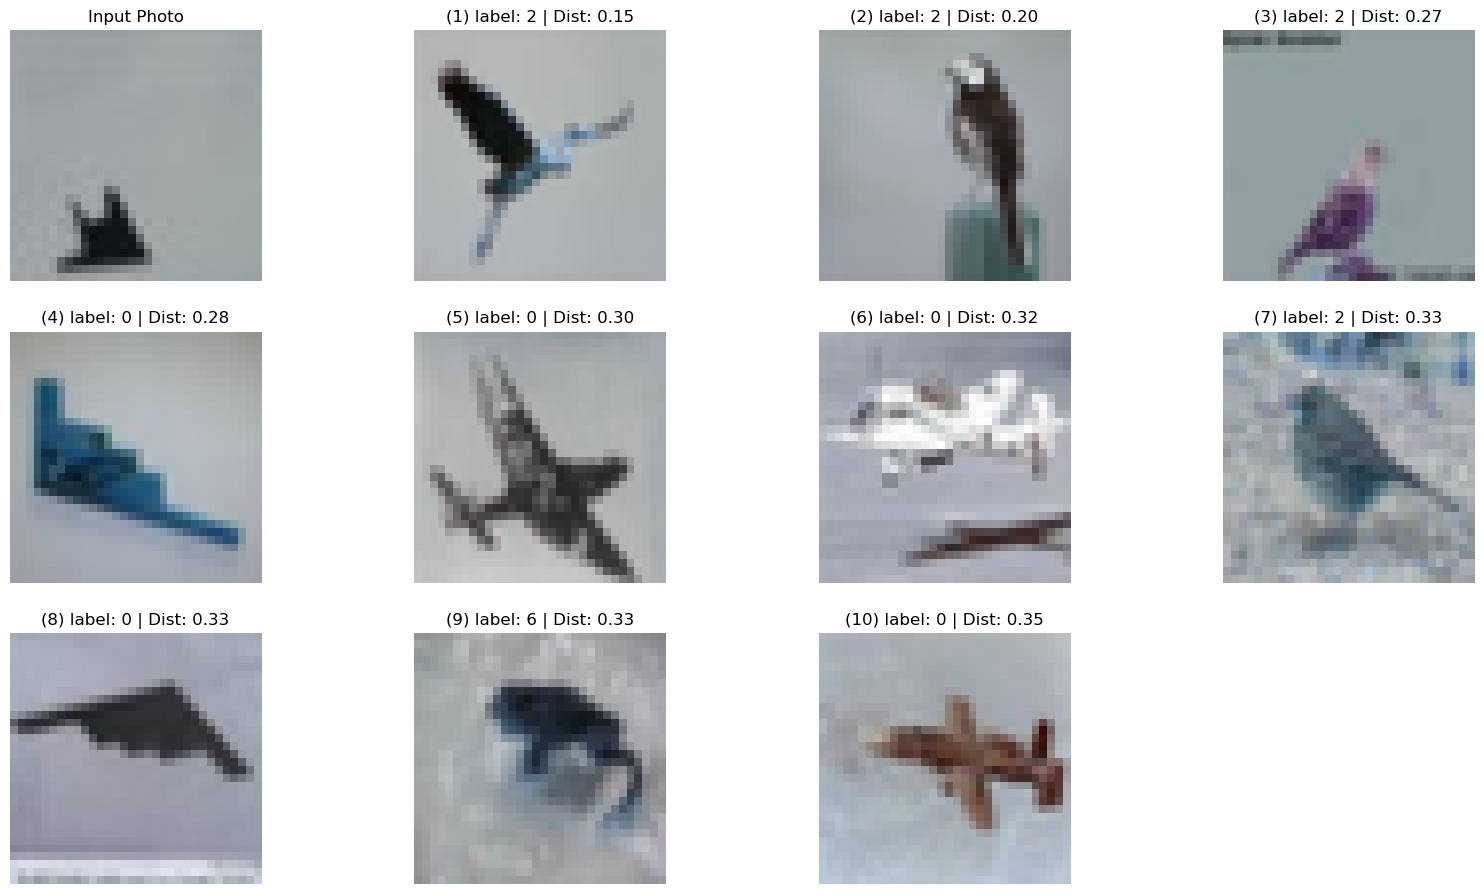

4 photos of those ten are in the same group as the input photo: 40.00%


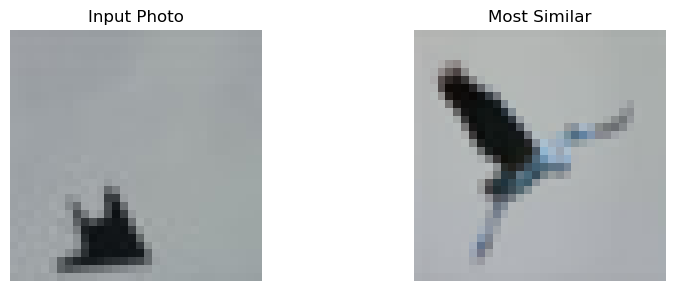

Similarity Score: 0.87


In [105]:
def main(input_photo_path, dataset_path, color_space):
    
    # Load CIFAR-10 dataset
    (x_train, y_train), (_, _) = cifar10.load_data()
    
    # Extract the last pictures from each class
    last_pictures = []
    
    # Loop through each class label (0 to 9)
    for class_label in range(10):
        
        # Get the indices of samples belonging to the current class
        class_indices = np.where(y_train == class_label)[0]
        # Get the index of the last sample in the current class
        last_picture_index = class_indices[-1]
        # Retrieve the last picture from the training set for the current class
        last_picture = x_train[last_picture_index]
        # Append the last picture to the list
        last_pictures.append(last_picture)

    # Choose the index of the class you want to use as input (0 to 9)
    input_class_index = 0  # Replace with the desired class index

    # Save the image to a file (replace 'path_to_save_image.jpg' with your desired file path)
    cv2.imwrite('input_photo.jpg', cv2.cvtColor(last_pictures[input_class_index], cv2.COLOR_RGB2BGR))

    # Set input_photo_path to the saved file path
    input_photo_path = 'input_photo.jpg'
    
    # Load the input photo and calculate its histogram
    input_photo = cv2.imread(input_photo_path)
    input_hist = calculate_histogram(input_photo, color_space)

    # Initialize an empty list to store distances
    distances = []

    # Loop through each photo in the training set
    for i, photo in enumerate(x_train):
        
        # Calculate histogram for the current photo
        photo_hist = calculate_histogram(photo, color_space)
        # Calculate Euclidean distance between input photo and current photo
        dist = compare_histograms(input_hist, photo_hist)
        # Append the distance, label, and photo to the distances list
        distances.append((dist, y_train[i, 0], photo))
 
    # Analyze the similarity between the input photo and the dataset
    analyze_similarity(input_photo, input_hist, distances, color_space)

if __name__ == "__main__":
    
    # Specify the local directory to download CIFAR-10
    dataset_path = os.path.expanduser('~/.keras/datasets/')

    # Download CIFAR-10 dataset if not already downloaded
    cifar10_dir = get_file('cifar-10-batches-py/test-batch', origin='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz', untar=True, cache_subdir=dataset_path)
    
    main(input_photo_path, dataset_path, color_space='hsv')